In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt 

# Data Labels Information
**Mushroom Data**: Attribute Information: (classes: edible=e, poisonous=p)

**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises**: bruises=t,no=f

**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment**: attached=a,descending=d,free=f,notched=n

**gill-spacing**: close=c,crowded=w,distant=d

**gill-size**: broad=b,narrow=n

**gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape**: enlarging=e,tapering=t

**stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**veil-type**: partial=p,universal=u

**veil-color**: brown=n,orange=o,white=w,yellow=y

**ring-number**: none=n,one=o,two=t

**ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

**population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Importing Training Data and Training Labels

In [35]:
X_train_data = pd.read_csv("mushroom_trn_data.csv")
X_train_labels = pd.read_csv("mushroom_trn_class_labels.csv", names=["column", 'class'])
X_train_data.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [37]:
X_train_data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,f,y,g,t,n,f,c,b,n,t,...,s,p,w,p,w,o,p,n,y,d
1,f,f,e,t,n,f,c,b,p,t,...,s,g,g,p,w,o,p,k,v,d
2,f,s,g,f,n,f,w,b,h,t,...,f,w,w,p,w,o,e,k,a,g
3,x,s,w,f,c,f,w,n,u,e,...,s,w,w,p,w,o,p,n,v,d
4,x,s,n,f,s,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,p


In [22]:
X_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 7311 non-null   object
 1   cap-surface               7311 non-null   object
 2   cap-color                 7311 non-null   object
 3   bruises                   7311 non-null   object
 4   odor                      7311 non-null   object
 5   gill-attachment           7311 non-null   object
 6   gill-spacing              7311 non-null   object
 7   gill-size                 7311 non-null   object
 8   gill-color                7311 non-null   object
 9   stalk-shape               7311 non-null   object
 10  stalk-root                7311 non-null   object
 11  stalk-surface-above-ring  7311 non-null   object
 12  stalk-surface-below-ring  7311 non-null   object
 13  stalk-color-above-ring    7311 non-null   object
 14  stalk-color-below-ring  

In [36]:
X_train_labels.head()

,column,class
0,d1,e
1,d2,e
2,d3,e
3,d4,p
4,d5,p


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='class', ylabel='Count'>

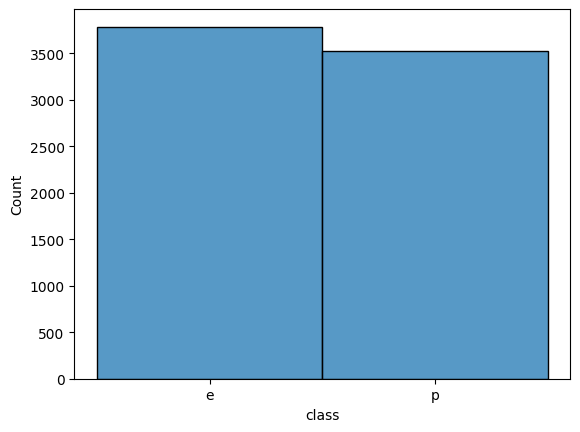

In [38]:
sns.histplot(X_train_labels["class"])

In [40]:
X_train_data = pd.get_dummies(X_train_data)
X_train_data.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,True,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False


In [91]:
from sklearn.preprocessing import LabelEncoder
# X_train_labels = X_train_labels.drop("column", axis= 1)
# X_train_labels.shape
y1 = X_train_labels.reshape((7311,))
print(y1)
# y = pd.DataFrame(y1, columns=["class"])
# print(y)
# print(type(y))
# y.head()
encoder = LabelEncoder()
# # 
y3 = encoder.fit_transform(y1)
print("y3: ", y3)
y_label = pd.DataFrame(y3, columns=["class"])
y_label.head()
# y.info()
# print(y['class'])

[0 0 0 ... 0 0 0]
y3:  [0 0 0 ... 0 0 0]


,class
0,0
1,0
2,0
3,1
4,1


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_label, test_size=0.2, random_state=42)


      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
565         False        False        False         True        False   
1883        False        False        False        False        False   
2458        False        False        False        False        False   
640         False        False        False         True        False   
3395        False        False         True        False        False   
...           ...          ...          ...          ...          ...   
5191        False        False         True        False        False   
5226        False        False        False        False        False   
5390        False        False        False        False        False   
860         False        False        False        False        False   
7270        False        False        False        False        False   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
565         False          False          

In [94]:
X_train.shape, X_test.shape

((5848, 117), (1463, 117))

In [95]:
y_train.shape, y_test.shape

((5848, 1), (1463, 1))

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
clf_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5882352941176471, 0.9375, 'x[27] <= 0.5\ngini = 0.499\nsamples = 5848\nvalue = [3040, 2808]'),
 Text(0.35294117647058826, 0.8125, 'x[53] <= 0.5\ngini = 0.288\nsamples = 3297\nvalue = [576, 2721]'),
 Text(0.23529411764705882, 0.6875, 'x[63] <= 0.5\ngini = 0.13\nsamples = 2897\nvalue = [203, 2694]'),
 Text(0.17647058823529413, 0.5625, 'x[25] <= 0.5\ngini = 0.045\nsamples = 2757\nvalue = [63, 2694]'),
 Text(0.11764705882352941, 0.4375, 'x[22] <= 0.5\ngini = 0.022\nsamples = 2724\nvalue = [30, 2694]'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2694\nvalue = [0, 2694]'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 140\nvalue = [140, 0]'),
 Text(0.47058823529411764, 0.6875, 'x[105] <= 0.5\ngini = 0.126\nsamples = 400\nvalue = [373, 27]'),
 Text(0.4117647058823529, 0.5625, 'gini = 0.0\nsamples =

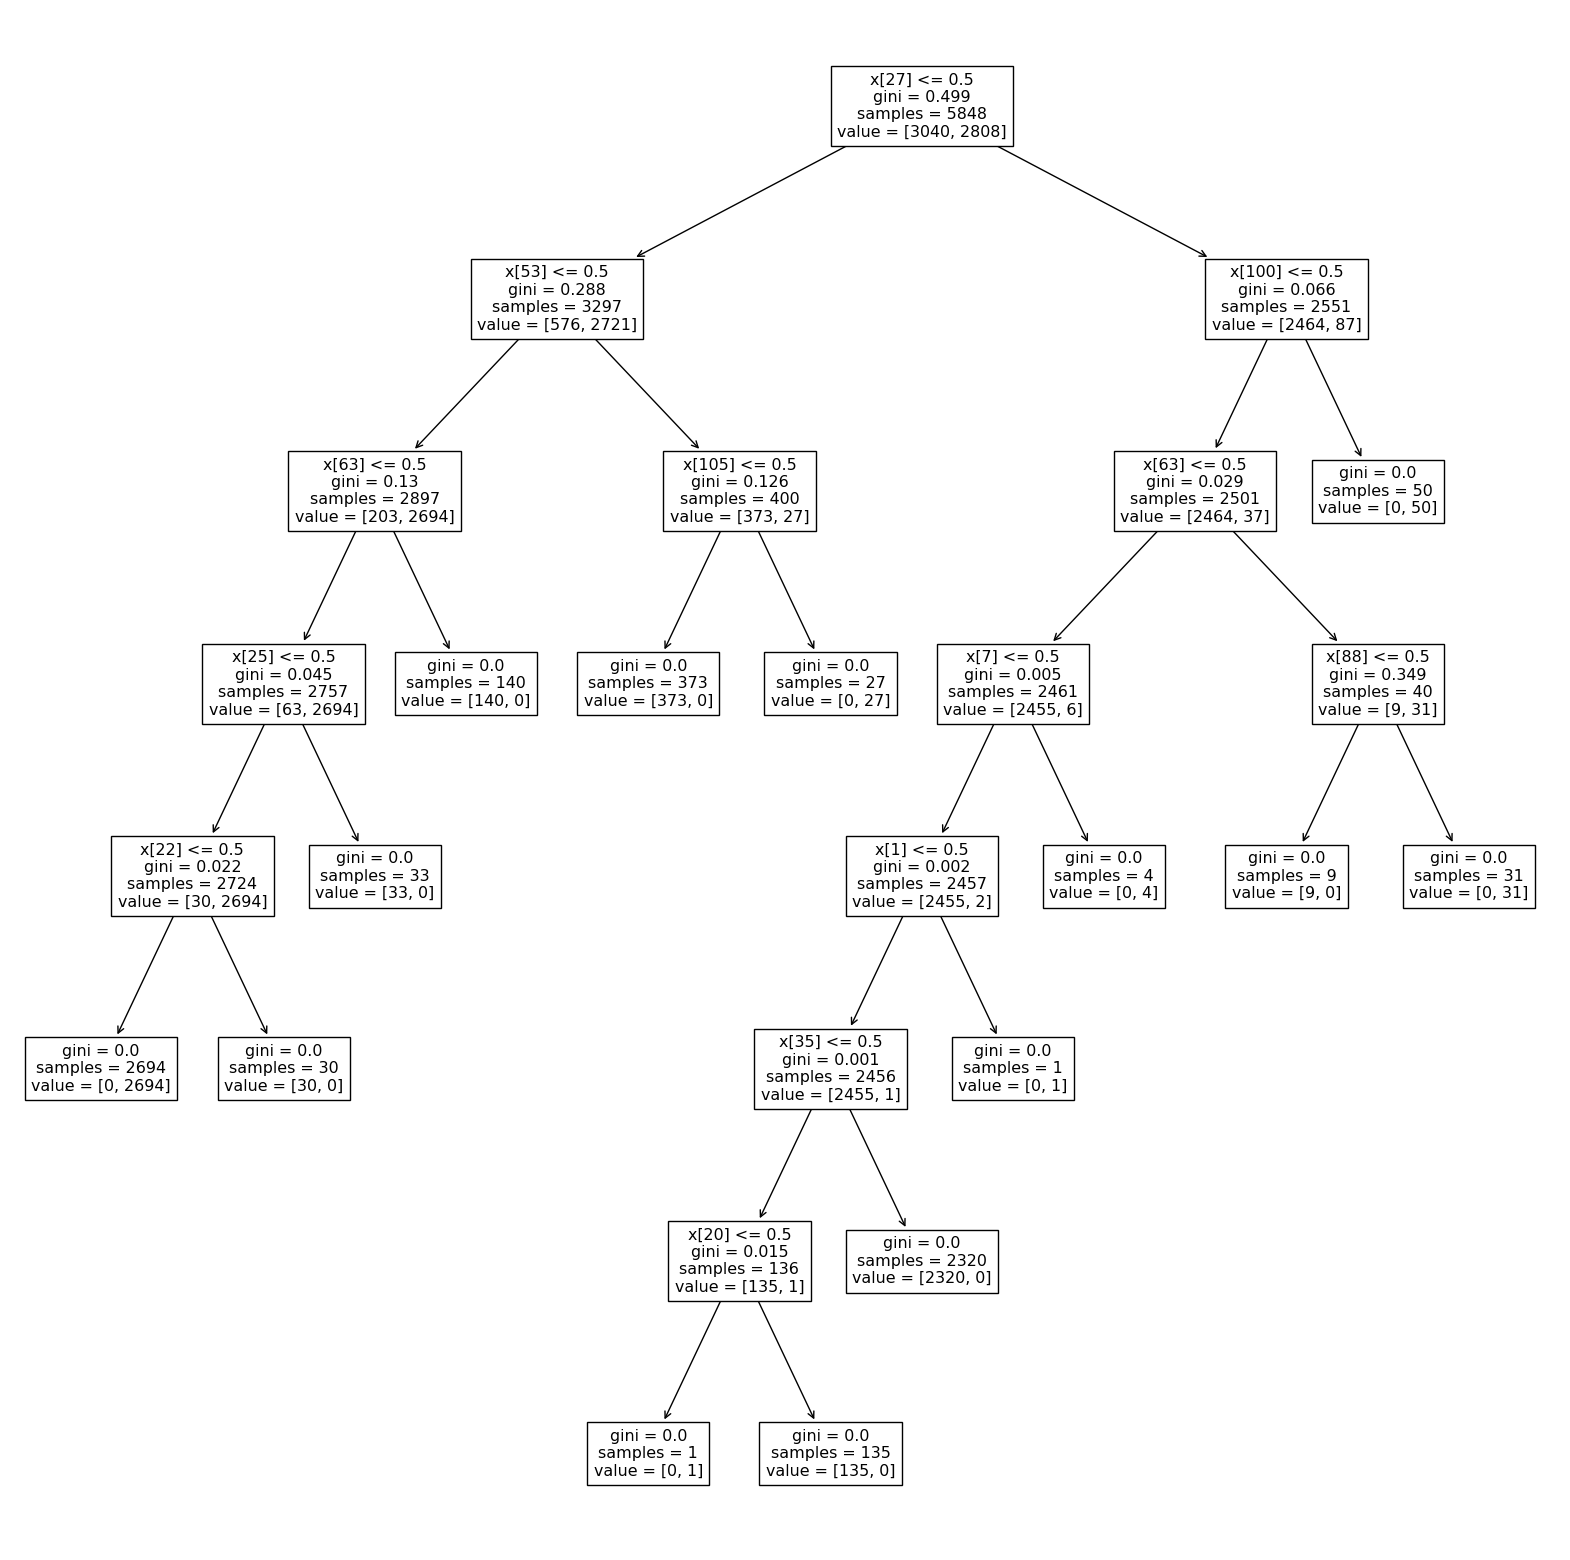

In [102]:
plt.figure(figsize=(20, 20))
tree.plot_tree(clf_gini.fit(X_train, y_train))